In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/halilberkayakkaya07/IoT-Smoke-Detection-Project-MTH2526-G45/refs/heads/main/data/raw/smoke_detection_iot.csv"


df = pd.read_csv(url)


print("Veri Setinin İlk 5 Satırı:")
display(df.head())

# Veri hakkında genel bilgi (boş değer var mı?)
print("\nVeri Özeti:")
df.info()

Veri Setinin İlk 5 Satırı:


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0



Veri Özeti:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Shape of the cleaned dataset: (62630, 13)


/tmp/ipython-input-754151235.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fire Alarm', data=df_clean, palette='viridis')


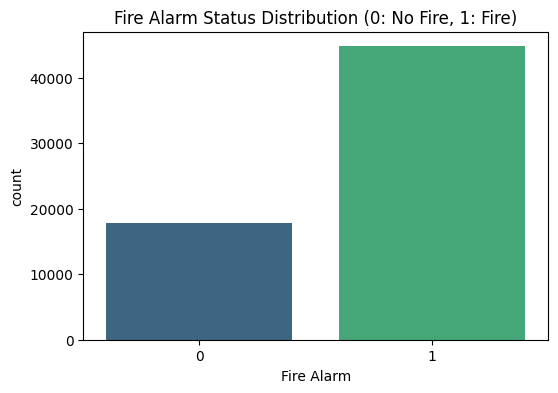

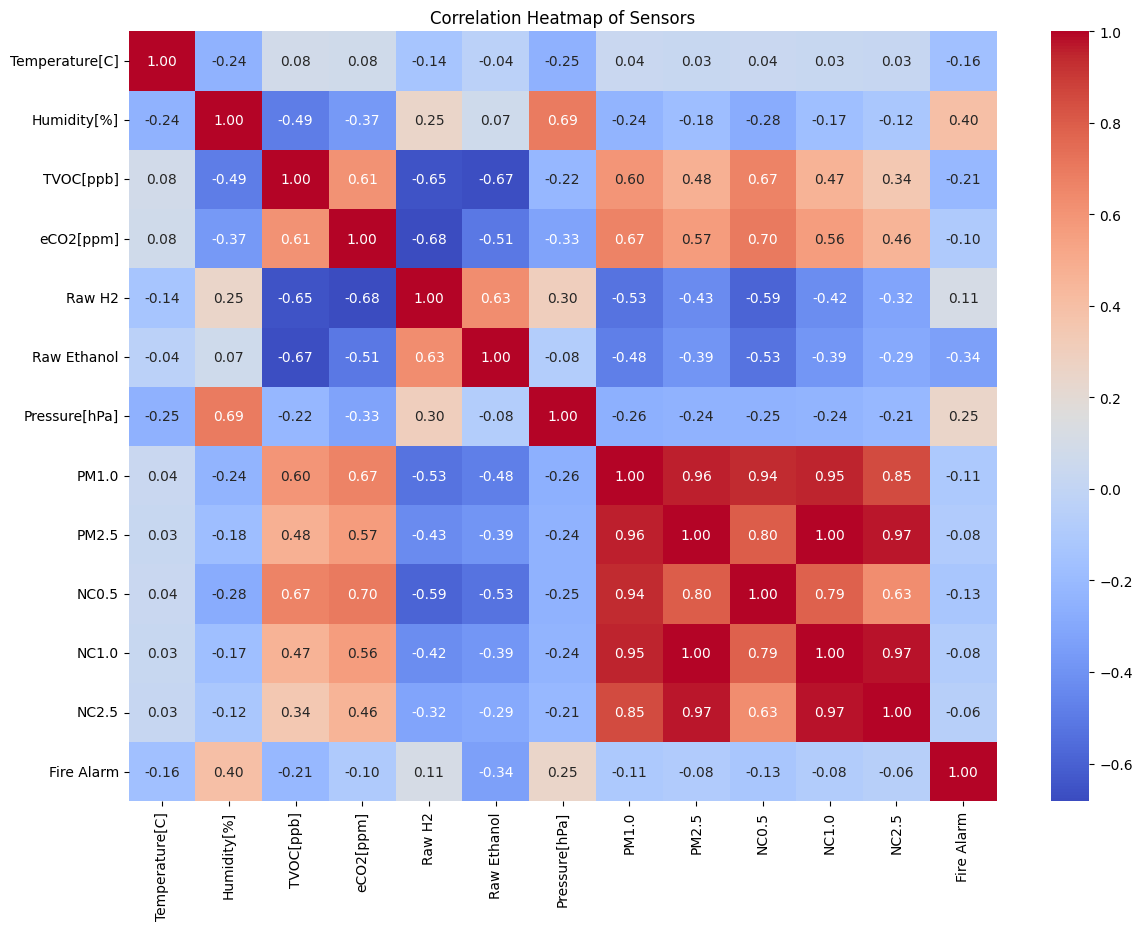

In [ ]:
# 1. Dropping Unnecessary Columns
# 'Unnamed: 0': Just an index, irrelevant.
# 'UTC': Timestamp, not needed for this baseline model.
# 'CNT': Sample counter, can cause data leakage, so we drop it.
drop_cols = ['Unnamed: 0', 'UTC', 'CNT']
df_clean = df.drop(columns=drop_cols, errors='ignore')

print("Shape of the cleaned dataset:", df_clean.shape)

# 2. Target Variable Distribution (Fire Alarm)
# This plot shows the balance between 'Fire' and 'No Fire' samples.
plt.figure(figsize=(6, 4))
sns.countplot(x='Fire Alarm', data=df_clean, palette='viridis')
plt.title('Fire Alarm Status Distribution (0: No Fire, 1: Fire)')
plt.show()

# 3. Correlation Matrix (Heatmap)
# This shows which sensors are most strongly related to the Fire Alarm.
plt.figure(figsize=(14, 10))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Sensors')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 1. Features (X) and Target (y) separation
# 'Fire Alarm' is what we want to predict (y). Everything else is input (X).
X = df_clean.drop('Fire Alarm', axis=1)
y = df_clean['Fire Alarm']

# 2. Train-Test Split
# We use 80% of data for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Training (Random Forest)
print("Model is training... Please wait.")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Training completed!")

# 4. Evaluation
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {acc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Saving the Model
# We save the trained model to a file so we can use it later in the AWS app.
joblib.dump(model, 'smoke_detection_model.pkl')
print("\nModel saved as 'smoke_detection_model.pkl'")

Model is training... Please wait.
Training completed!

Model Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3594
           1       1.00      1.00      1.00      8932

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526


Model saved as 'smoke_detection_model.pkl'
